### Data Source: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the csv file
data = pd.read_csv("Resources/credit_risk_dataset.csv")

# Display the dataframe
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
# find total loan amount for age less than 20
total_loan_amount = data.loc[data["person_age"] <= 20, "loan_amnt"].sum()
print(f"Total loan amount for age less than 20: {total_loan_amount}")

Total loan amount for age less than 20: 145225


In [4]:
# Make a copy of the dataframe
df = data.copy()

In [5]:
# Display summary information about the DataFrame, including column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
# Count the number of missing values in each column of the DataFrame
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

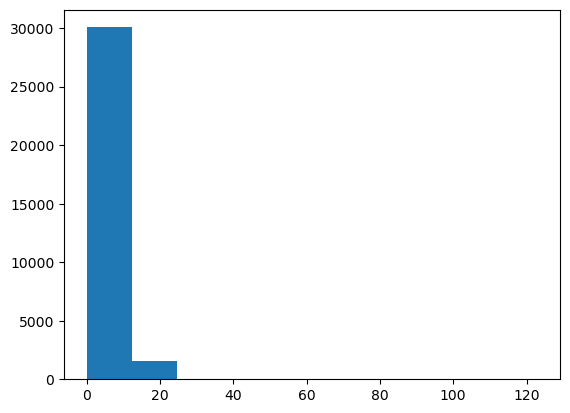

In [ ]:
# Create histogram for the column person_emp_length
df["person_emp_length"].hist(grid=False)

plt.show()



<Axes: >

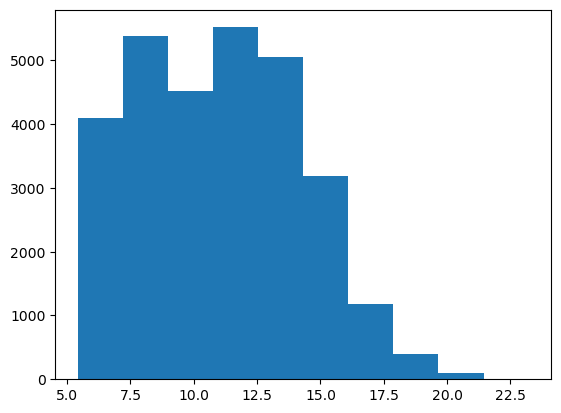

In [ ]:
# Create histogram for the column loan_int_rate
df["loan_int_rate"].hist(grid=False)

In [9]:
# Remove rows with any missing values from the DataFrame
df = df.dropna(how='any')

# Count the number of missing values in each column of the DataFrame after removing rows with missing values to ensure that no missing values remain
df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [10]:
# Rename the columns
df1 = df.rename(columns={'person_age': 'age', 
                            'person_income': 'income', 
                            'person_home_ownership': 'home_ownership', 
                            'person_emp_length': 'employment_duration', 
                            'loan_intent': 'loan_purpose', 
                            'loan_grade': 'loan_grade',
                            'loan_amnt': 'loan_amount', 
                            'loan_int_rate': 'int_rate', 
                            'loan_status': 'loan_status', 
                            'loan_percent_income': 'loan_income_pct', 
                            'cb_person_default_on_file': 'past_default_status',
                            'cb_person_cred_hist_length': 'credit_history_length'})

# Display the first few rows of the DataFrame
df1.head()


,age,income,home_ownership,employment_duration,loan_purpose,loan_grade,loan_amount,int_rate,loan_status,loan_income_pct,past_default_status,credit_history_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [12]:
# Display summary statistics for the DataFrame

df1.describe()



,age,income,employment_duration,loan_amount,int_rate,loan_status,loan_income_pct,credit_history_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


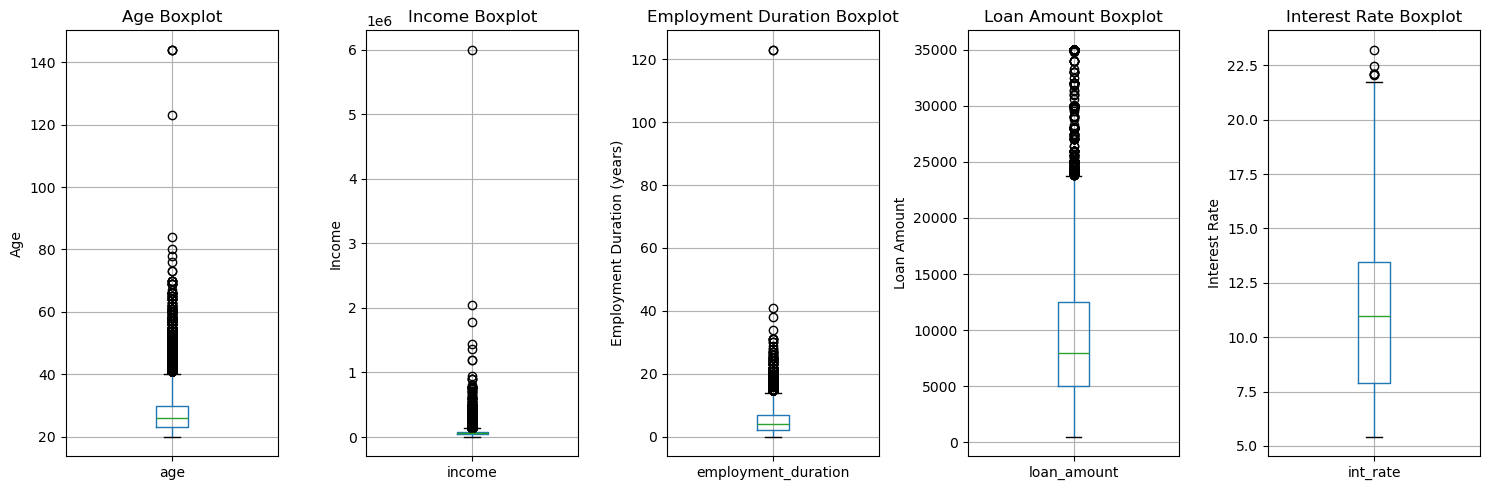

In [13]:
# Create a figure with 3 subplots in 1 row to detect outliers
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Create boxplots
df1.boxplot(column='age', ax=axes[0])
axes[0].set_title('Age Boxplot')
axes[0].set_ylabel('Age')

df1.boxplot(column='income', ax=axes[1])
axes[1].set_title('Income Boxplot')
axes[1].set_ylabel('Income')

df1.boxplot(column='employment_duration', ax=axes[2])
axes[2].set_title('Employment Duration Boxplot')
axes[2].set_ylabel('Employment Duration (years)')

df1.boxplot(column='loan_amount', ax=axes[3])
axes[3].set_title('Loan Amount Boxplot')
axes[3].set_ylabel('Loan Amount')

df1.boxplot(column='int_rate', ax=axes[4])
axes[4].set_title('Interest Rate Boxplot')
axes[4].set_ylabel('Interest Rate')
# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [14]:
# Remove the outliers for the age and employment_duration columns
df1 = df1[(df1['age'] < 100) & (df1['employment_duration'] < 50)]

# Display summary statistics for the DataFrame
df1.describe()


,age,income,employment_duration,loan_amount,int_rate,loan_status,loan_income_pct,credit_history_length
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.216611,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.411942,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
# Save the dataframe to csv
data_clean = df1.to_csv('Resources/data_clean.csv', index=False)